In [1]:
import sys
sys.path.append('..')
import os
import torch
from models.lstm import CVAE
from models.lstm_stl import CVAE as CVAE_STL

import numpy as np
from utils import test_utils as tut
from utils import prob_utils as put
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

/Users/priyakasimbeg/anaconda3/envs/asl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/priyakasimbeg/anaconda3/envs/asl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/priyakasimbeg/anaconda3/envs/asl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/priyakasimbeg/anaconda3/

# Version 1

In [69]:
# Load model
z = 1
run = 0

layout = [
    ('model={:s}', 'cvae'),
    ('z={:02d}', z),
    ('run={:04d}', run)
]

model_name = '_'.join([t.format(v) for (t, v) in layout])

cvae = CVAE(z_dim=z, name=os.path.join(model_name), version='v1')
tut.load_model_by_name(cvae, global_step=20000)

# Load data
train_loader, valid_loader = put.get_data_loaders()

loaded from checkpoints/model=cvae_z=01_run=0000/model-20000.pt


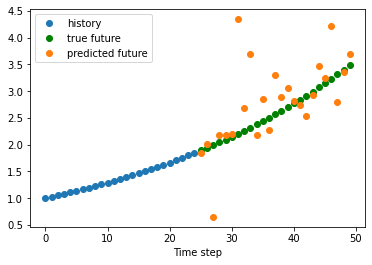

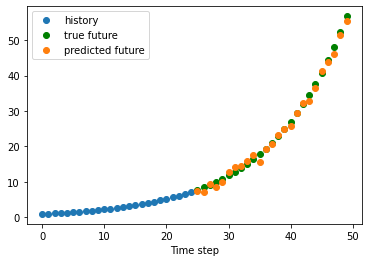

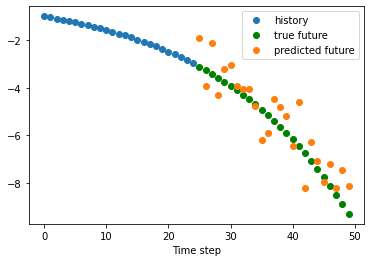

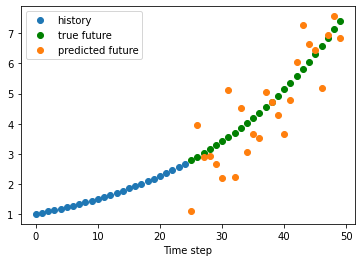

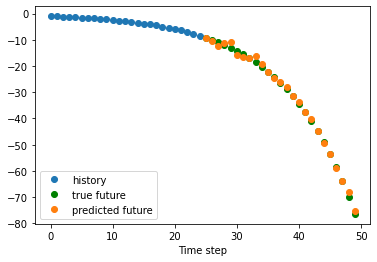

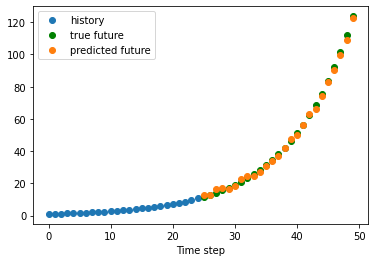

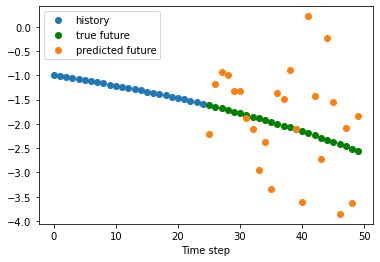

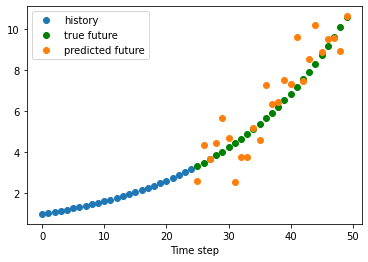

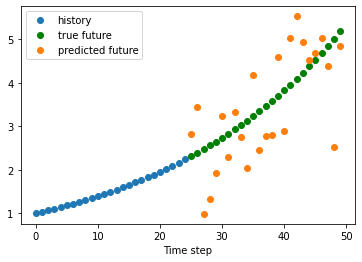

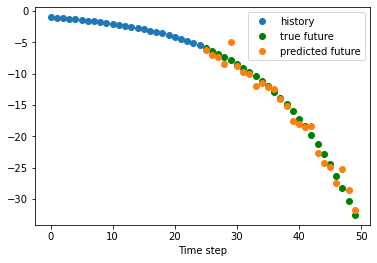

In [59]:
# Visualize some stuff
for i, (x, y) in enumerate(valid_loader):
    batch = len(x)
    z = cvae.sample_z(1) 
    y_pred = cvae.sample_y_given(x, z)
    
    x = x[0]
    y = y[0]
    y_pred = y_pred[0]
    x_hist = range(0, len(x))
    x_pred = range(len(x), len(x) + len(y))
    
    plt.figure()
    plt.plot(x_hist, x, 'o', label='history')
    plt.plot(x_pred, y, 'o', color='green', label='true future')
    plt.plot(x_pred, y_pred, 'o', label='predicted future')
    plt.xlabel('Time step')
    plt.legend()
    

# Version 2: Discrete Latent Space

In [27]:
# Load model
z = 3
run = 1

layout = [
    ('model={:s}', 'cvae'),
    ('z={:02d}', z),
    ('run={:04d}', run)
]

model_name = '_'.join([t.format(v) for (t, v) in layout])

cvae = CVAE(z_dim=z, name=os.path.join(model_name))
tut.load_model_by_name(cvae, global_step=20000)

# Load data
train_loader, valid_loader = put.get_data_loaders()

loaded from checkpoints/model=cvae_z=03_run=0001/model-20000.pt


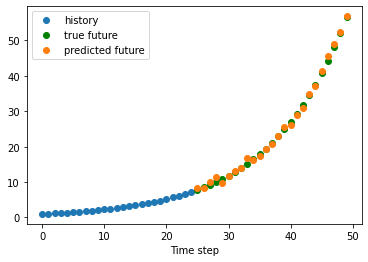

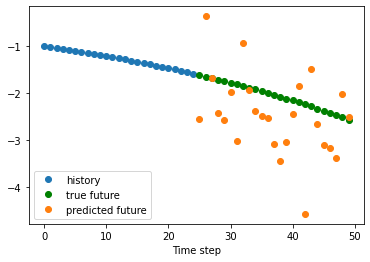

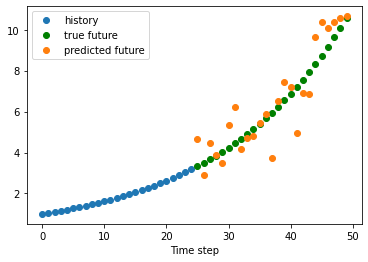

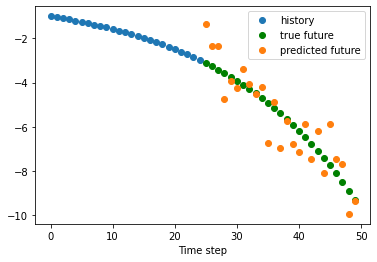

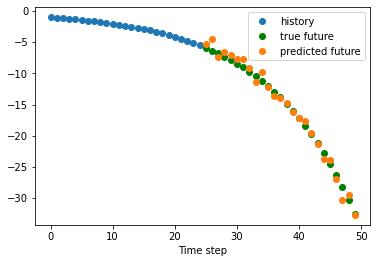

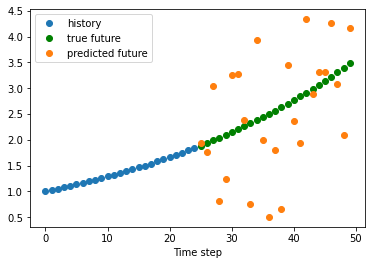

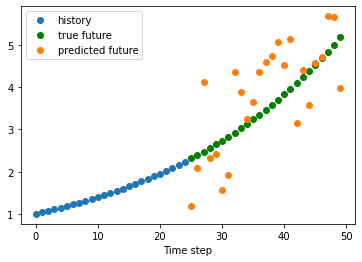

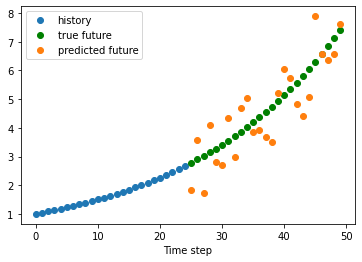

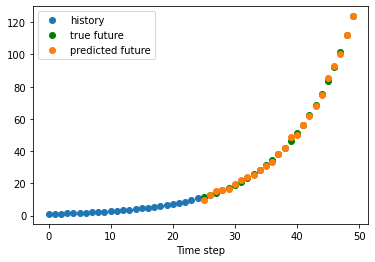

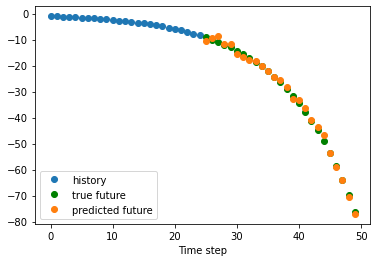

In [28]:
for i, (x, y) in enumerate(valid_loader):
    batch = len(x)
    z = cvae.sample_z(x)
    y_pred = cvae.sample_y_given(x, z)
    
    x = x[0]
    y = y[0]
    y_pred = y_pred[0]
    x_hist = range(0, len(x))
    x_pred = range(len(x), len(x) + len(y))
    
    plt.figure()
    plt.plot(x_hist, x, 'o', label='history')
    plt.plot(x_pred, y, 'o', color='green', label='true future')
    plt.plot(x_pred, y_pred, 'o', label='predicted future')
    plt.xlabel('Time step')
    plt.legend()

# Version 3: 2D data

In [ ]:
# Load model
z = 3
run = 2
h = 45

layout = [
    ('model={:s}', 'cvae'),
    ('z={:02d}', z),
    ('run={:04d}', run)
]

model_name = '_'.join([t.format(v) for (t, v) in layout])

cvae = CVAE(x_dim=h, y_dim=50-h, z_dim=z, name=os.path.join(model_name))
tut.load_model_by_name(cvae, global_step=20000)

# Load data
train_loader, valid_loader = put.get_data_loaders('fork', history_size=cvae.x_dim)

In [ ]:
for i, (x, y) in enumerate(valid_loader):
    batch = len(x)
    z = cvae.sample_z(x)
    y_pred = cvae.sample_y_given(x, z)
    
    x = x[0]
    y = y[0]
    y_pred = y_pred[0]
    y_pred = np.reshape(y_pred, (-1, 2))
    x_hist = range(0, len(x))
    x_pred = range(len(x), len(x) + len(y))
    
    plt.figure()
    plt.plot(x[:, 0], x[:, 1], 'o')
    plt.plot(y[:, 0], y[:, 1], 'o')
    plt.plot(y_pred[:, 0], y_pred[:, 1], 'o')
    plt.axis('equal')
    
    if i > 10:
        break

# Version 4 Fork

In [2]:
# Load model
z = 3
run = 4
h = 45

layout = [
    ('model={:s}', 'cvae'),
    ('z={:02d}', z),
    ('run={:04d}', run)
]

model_name = '_'.join([t.format(v) for (t, v) in layout])

cvae = CVAE(x_dim=2, y_dim=2, z_dim=z, name=os.path.join(model_name))
tut.load_model_by_name(cvae, global_step=10000)

# Load data
train_loader, valid_loader = put.get_data_loaders('fork')

loaded from checkpoints/model=cvae_z=03_run=0004/model-10000.pt


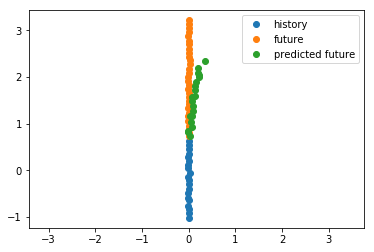

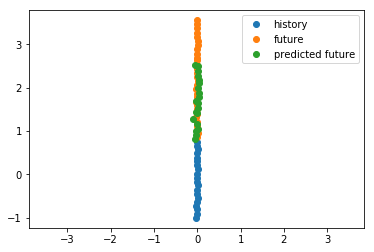

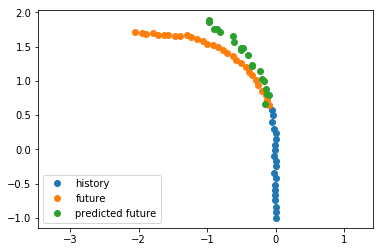

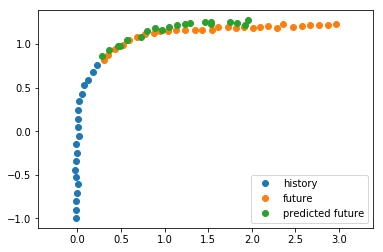

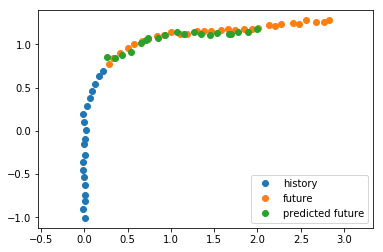

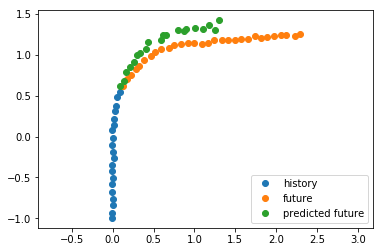

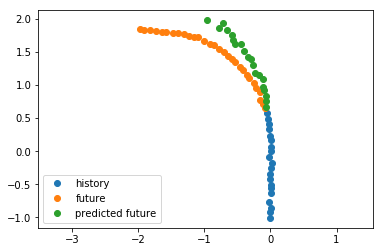

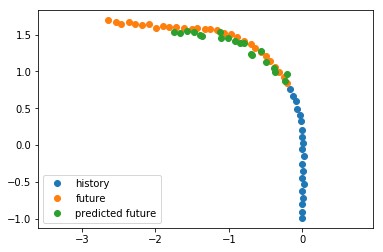

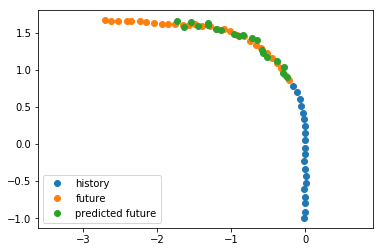

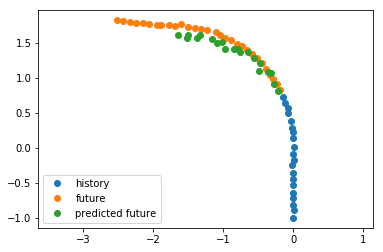

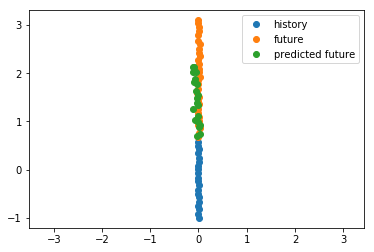

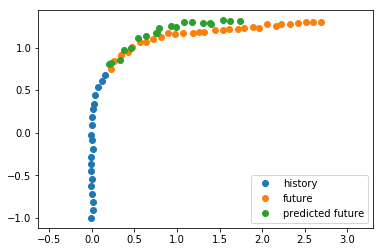

In [3]:
for i, (x, y) in enumerate(valid_loader):
    y_pred = cvae.sample_y(x)
    
    x = x[0]
    y = y[0]
    y_pred = y_pred[0]
    y_pred = np.reshape(y_pred, (-1, 2))
    x_hist = range(0, len(x))
    x_pred = range(len(x), len(x) + len(y))
    
    plt.figure()
    plt.plot(x[:, 0], x[:, 1], 'o', label='history')
    plt.plot(y[:, 0], y[:, 1], 'o', label='future')
    plt.plot(y_pred[:, 0], y_pred[:,1], 'o', label='predicted future')
    #print(y_pred[:, 1])
    plt.axis('equal')
    plt.legend()
    
    if i > 10:
        break


## Version 5 Fan

In [30]:
# Load model
z = 3
run = 5

layout = [
    ('model={:s}', 'cvae'),
    ('z={:02d}', z),
    ('run={:04d}', run)
]

model_name = '_'.join([t.format(v) for (t, v) in layout])

cvae = CVAE(x_dim=2, y_dim=2, z_dim=z, name=os.path.join(model_name))
tut.load_model_by_name(cvae, global_step=20000)

# Load data
train_loader, valid_loader = put.get_data_loaders('fan')

loaded from checkpoints/model=cvae_z=03_run=0005/model-20000.pt


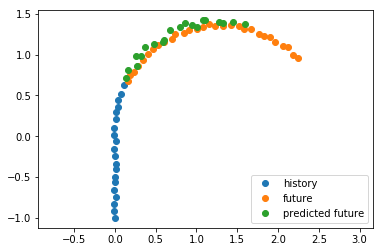

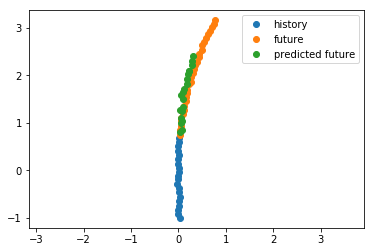

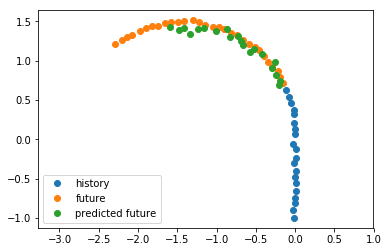

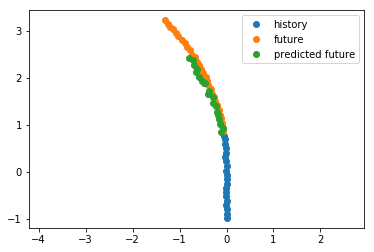

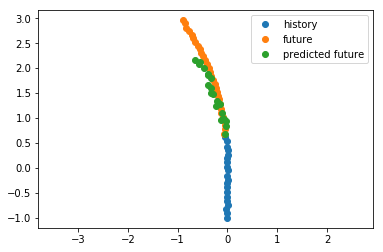

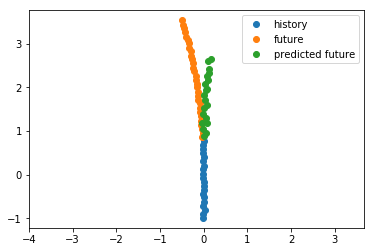

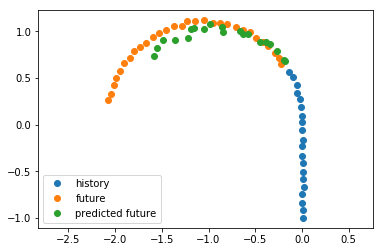

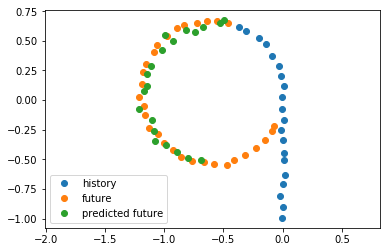

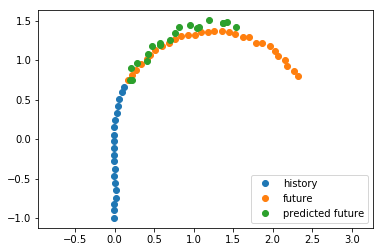

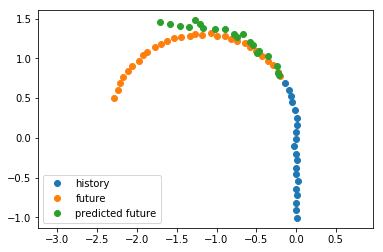

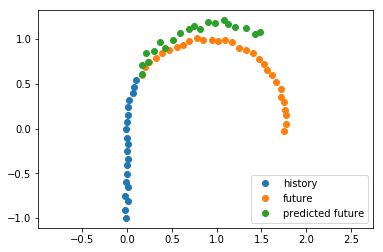

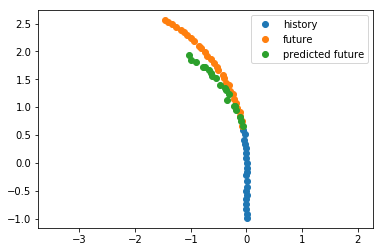

In [31]:
for i, (x, y) in enumerate(valid_loader):
    y_pred = cvae.sample_y(x)
    
    x = x[0]
    y = y[0]
    y_pred = y_pred[0]
    y_pred = np.reshape(y_pred, (-1, 2))
    x_hist = range(0, len(x))
    x_pred = range(len(x), len(x) + len(y))
    
    plt.figure()
    plt.plot(x[:, 0], x[:, 1], 'o', label='history')
    plt.plot(y[:, 0], y[:, 1], 'o', label='future')
    plt.plot(y_pred[:, 0], y_pred[:,1], 'o', label='predicted future')
    #print(y_pred[:, 1])
    plt.axis('equal')
    plt.legend()
    
    if i > 10:
        break

## Version 6 Fan with pSTL for curvature

In [123]:
# Load model
z = 3
run = 6

layout = [
    ('model={:s}', 'cvae'),
    ('z={:02d}', z),
    ('run={:04d}', run)
]

model_name = '_'.join([t.format(v) for (t, v) in layout])

cvae = CVAE_STL(x_dim=2, y_dim=2, z_dim=z, name=os.path.join(model_name))
tut.load_model_by_name(cvae, global_step=20000)

# Load data
train_loader, valid_loader = put.get_data_loaders('fan_clean', shuffle_dataset=True, meta=True)

loaded from checkpoints/model=cvae_z=03_run=0006/model-20000.pt


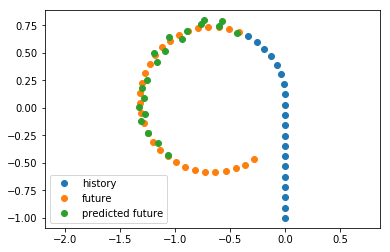

In [132]:
for i, (x, y, k) in enumerate(valid_loader):
    if i not in [5]:
        continue
        
    y_pred = cvae.sample_y(x, k)
    
    x = x[0]
    y = y[0]
    y_pred = y_pred[0]
    y_pred = np.reshape(y_pred, (-1, 2))
    x_hist = range(0, len(x))
    x_pred = range(len(x), len(x) + len(y))
    
    plt.figure()
    plt.plot(x[:, 0], x[:, 1], 'o', label='history')
    plt.plot(y[:, 0], y[:, 1], 'o', label='future')
    plt.plot(y_pred[:, 0], y_pred[:,1], 'o', label='predicted future')
    #print(y_pred[:, 1])
    plt.axis('equal')
    plt.legend()
    
#     plt.xlim(-1.5, 0.5)
#     plt.ylim(-1.2, 1)


## Version 7 Stop

In [143]:
# Load model
z = 2
run = 7

layout = [
    ('model={:s}', 'cvae'),
    ('z={:02d}', z),
    ('run={:04d}', run)
]

model_name = '_'.join([t.format(v) for (t, v) in layout])

cvae = CVAE_STL(x_dim=2, y_dim=2, z_dim=z, name=os.path.join(model_name))
tut.load_model_by_name(cvae, global_step=20000)

# Load data
train_loader, valid_loader = put.get_data_loaders('stop', shuffle_dataset=True, meta=True,
                                                 history_size=13)

loaded from checkpoints/model=cvae_z=02_run=0007/model-20000.pt


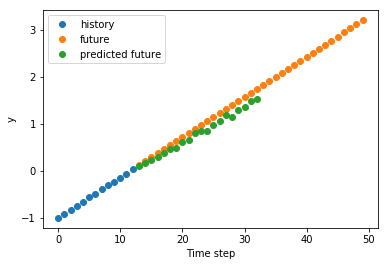

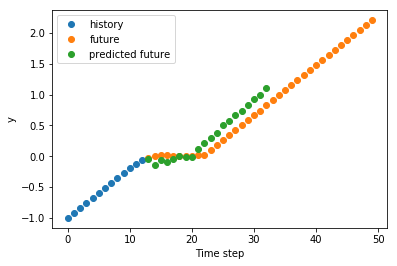

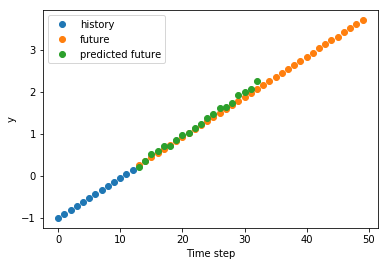

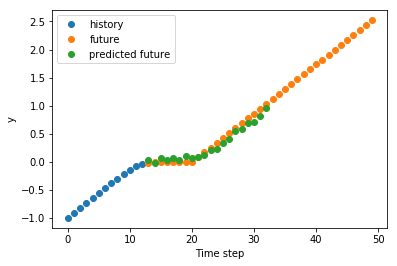

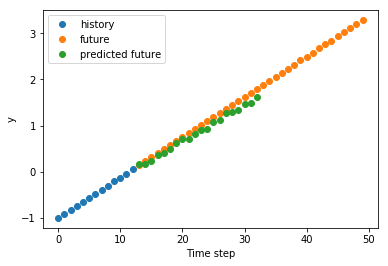

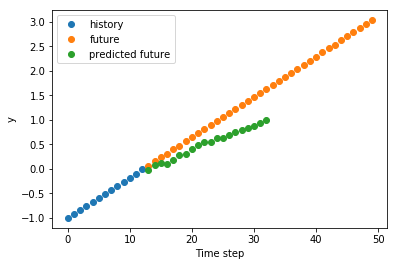

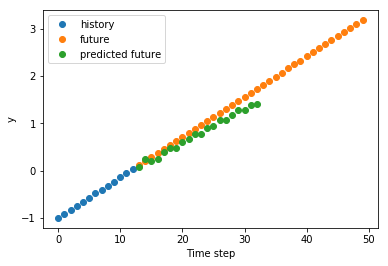

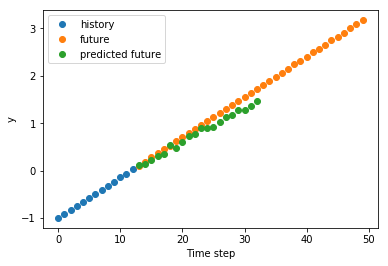

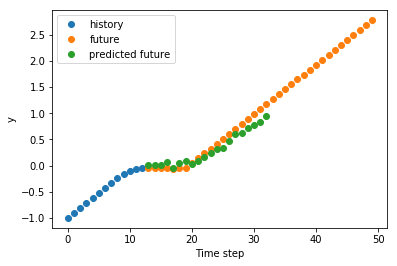

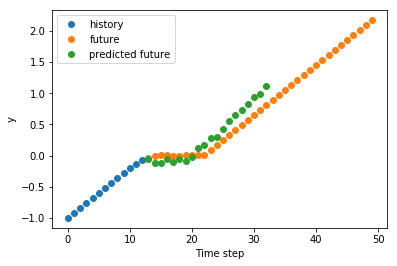

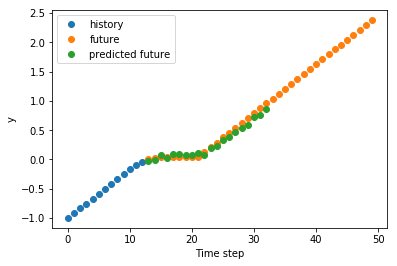

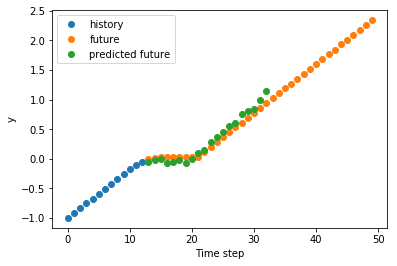

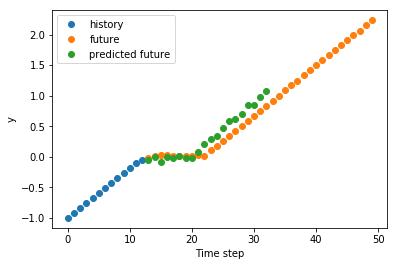

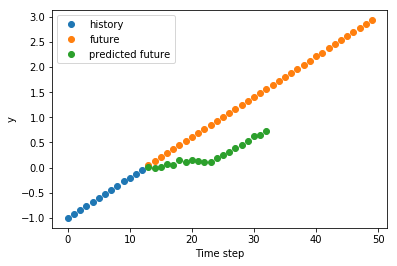

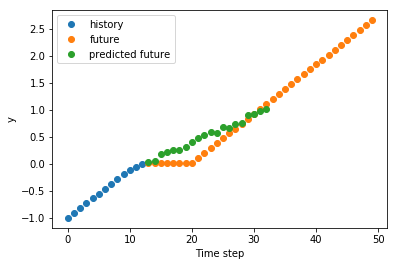

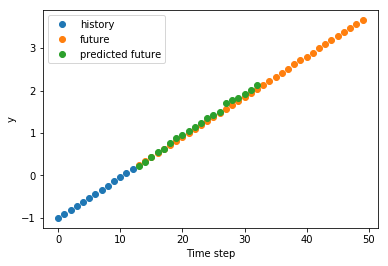

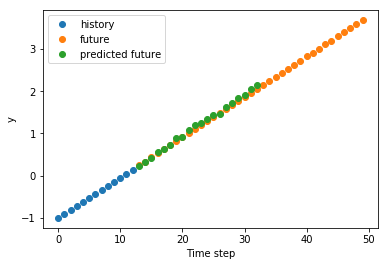

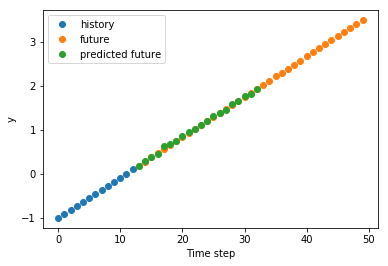

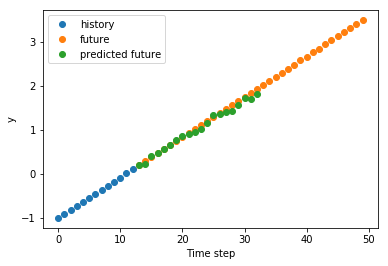

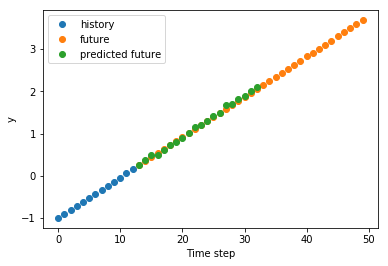

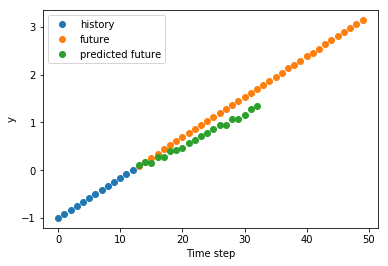

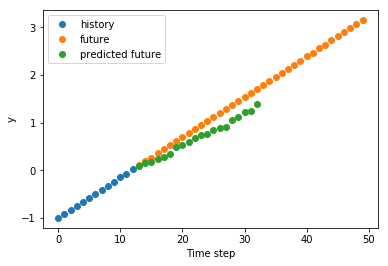

In [146]:
for i, (x, y, k) in enumerate(valid_loader):
        
    y_pred = cvae.sample_y(x, k)
    
    x = x[0]
    y = y[0]
    y_pred = y_pred[0]
    y_pred = np.reshape(y_pred, (-1, 2))
    x_hist = range(0, len(x))
    x_pred = range(len(x), len(x) + len(y))
    
    hist_len = len(x[:, 0])
    future_len = len(y[:, 0])
    pred_future_len = len(y_pred[:, 1])
    
    plt.figure()
    plt.plot(range(hist_len), x[:, 1], 'o', label='history')
    plt.plot(range(hist_len, hist_len + future_len), y[:, 1], 'o', label='future')
    plt.plot(range(hist_len, hist_len + pred_future_len), y_pred[:,1], 'o', label='predicted future')
    plt.legend()
    plt.ylabel('y')
    plt.xlabel('Time step')
    
    if i > 20:
        break
    
    

## Version 8

In [155]:
# Load model
z = 2
run = 8

layout = [
    ('model={:s}', 'cvae'),
    ('z={:02d}', z),
    ('run={:04d}', run)
]

model_name = '_'.join([t.format(v) for (t, v) in layout])

cvae = CVAE_STL(x_dim=2, y_dim=2, z_dim=z, name=os.path.join(model_name),
               stl=True, robustness_type='stop')
tut.load_model_by_name(cvae, global_step=20000)

# Load data
train_loader, valid_loader = put.get_data_loaders('stop', shuffle_dataset=True, meta=True,
                                                 history_size=13)

loaded from checkpoints/model=cvae_z=02_run=0008/model-20000.pt


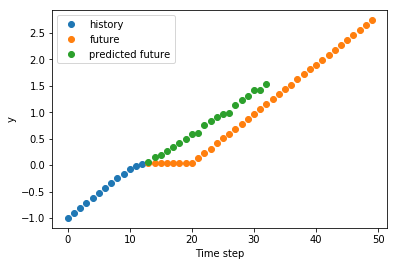

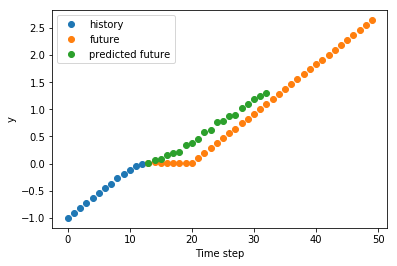

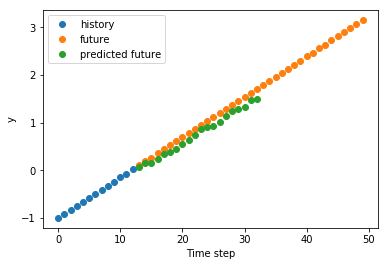

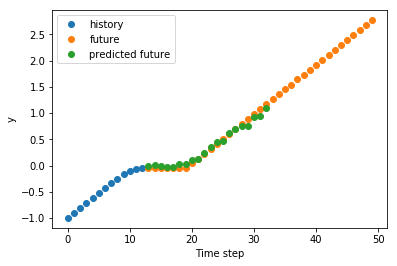

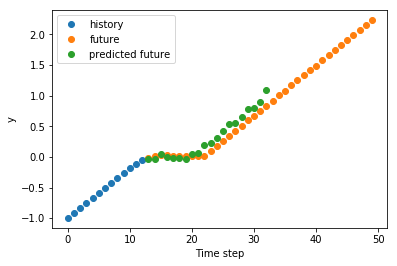

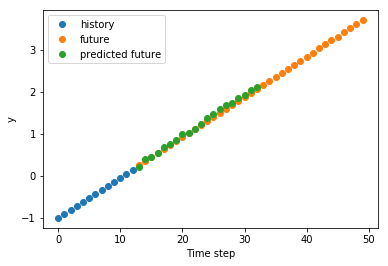

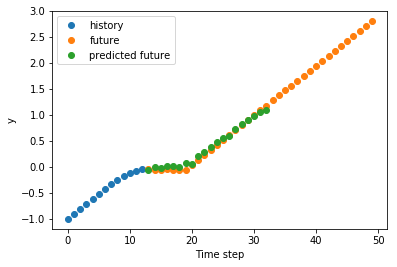

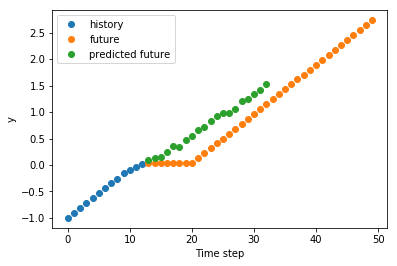

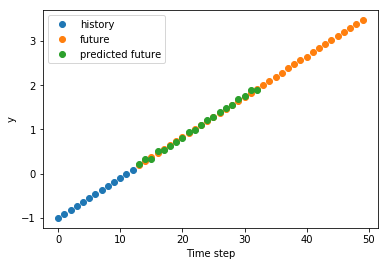

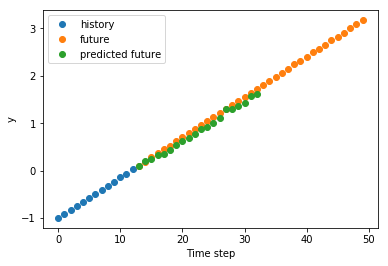

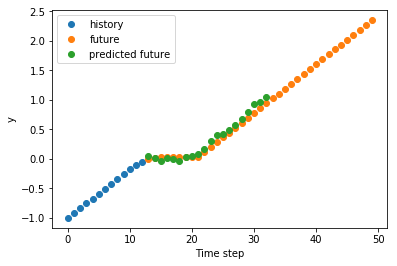

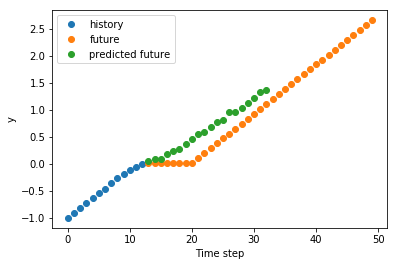

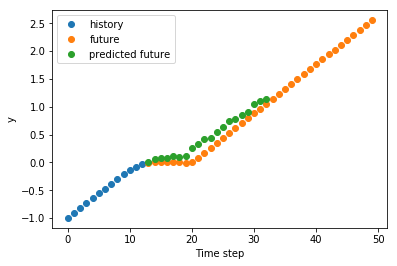

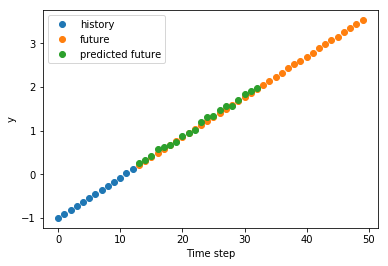

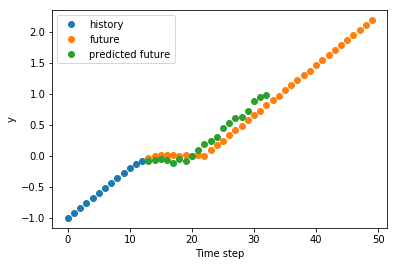

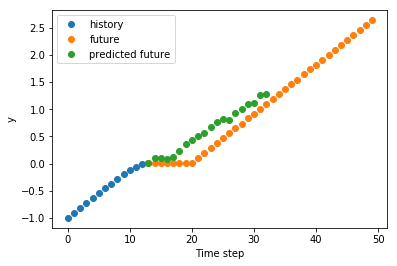

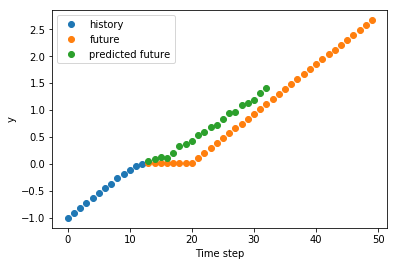

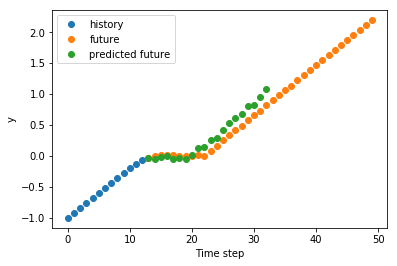

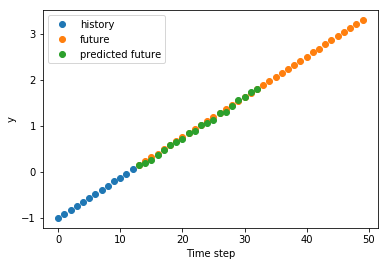

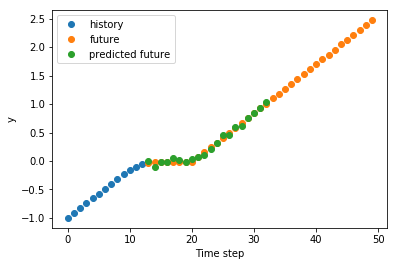

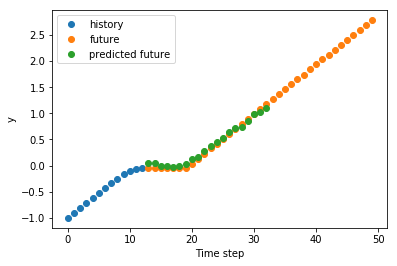

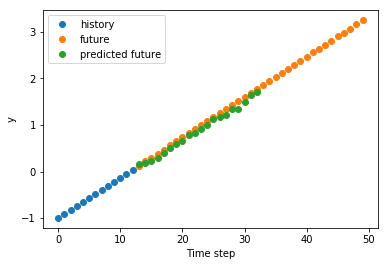

In [156]:
for i, (x, y, k) in enumerate(valid_loader):
        
    y_pred = cvae.sample_y(x, k)
    
    x = x[0]
    y = y[0]
    y_pred = y_pred[0]
    y_pred = np.reshape(y_pred, (-1, 2))
    x_hist = range(0, len(x))
    x_pred = range(len(x), len(x) + len(y))
    
    hist_len = len(x[:, 0])
    future_len = len(y[:, 0])
    pred_future_len = len(y_pred[:, 1])
    
    plt.figure()
    plt.plot(range(hist_len), x[:, 1], 'o', label='history')
    plt.plot(range(hist_len, hist_len + future_len), y[:, 1], 'o', label='future')
    plt.plot(range(hist_len, hist_len + pred_future_len), y_pred[:,1], 'o', label='predicted future')
    plt.legend()
    plt.ylabel('y')
    plt.xlabel('Time step')
    
    if i > 20:
        break